<a href="https://colab.research.google.com/github/sys6-exe/SanRaksha/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the input shape based on your dataset, e.g., 10 time steps and 5 features
input_shape = (10, 5)

# Build the model
model = Sequential([
    # LSTM layer to capture temporal patterns in maternal health data
    LSTM(64, input_shape=input_shape, return_sequences=False),
    # Dropout layer to help prevent overfitting
    Dropout(0.2),
    # Dense layer for further processing
    Dense(32, activation='relu'),
    # Output layer: 1 neuron with sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model with the Adam optimizer and binary cross-entropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Example: To train the model, use your training data:
# model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,033 (78.25 KB)

 Trainable params: 20,033 (78.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate synthetic data
num_samples = 1000
time_steps = 10
features = 5

# Simulate patient data (values between 0 and 1 for prototype)
X = np.random.rand(num_samples, time_steps, features)

# Simulate binary labels (0 = low-risk, 1 = high-risk)
y = np.random.randint(0, 2, size=(num_samples, 1))

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential([
    LSTM(64, input_shape=(time_steps, features)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.4628 - loss: 0.6945 - val_accuracy: 0.4950 - val_loss: 0.6934
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5107 - loss: 0.6948 - val_accuracy: 0.4900 - val_loss: 0.6944
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4981 - loss: 0.6940 - val_accuracy: 0.4900 - val_loss: 0.6939
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4935 - loss: 0.6943 - val_accuracy: 0.4900 - val_loss: 0.6937
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5217 - loss: 0.6920 - val_accuracy: 0.4900 - val_loss: 0.6959
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5009 - loss: 0.6945 - val_accuracy: 0.5000 - val_loss: 0.6945
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5073 - loss: 0.6933 - val_accuracy: 0.4950 - val_loss: 0.6944
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5346 - loss: 0.6948 - val_accuracy: 0.4850 - val_loss

In [5]:
# sanraksha.py

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# -----------------------------
# 1. Configuration & Data Generation
# -----------------------------
np.random.seed(42)
tf.random.set_seed(42)

# Simulate patient data: 1000 samples, 10 time steps, 5 health features
num_samples = 1000
time_steps = 10
features = 5

X = np.random.rand(num_samples, time_steps, features)
y = np.random.randint(0, 2, size=(num_samples, 1))  # Binary labels

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# 2. Model Architecture (LSTM + Dense)
# -----------------------------
model = Sequential([
    LSTM(64, input_shape=(time_steps, features)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# -----------------------------
# 3. Train the Model
# -----------------------------
print("Training LSTM model on synthetic health data...")
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# -----------------------------
# 4. Evaluate the Model
# -----------------------------
print("\nEvaluating on test data...")
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Optional: Print classification report
y_pred = (model.predict(X_test) > 0.5).astype(int)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
model.save("sanraksha.keras")

Training LSTM model on synthetic health data...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.5035 - loss: 0.6936 - val_accuracy: 0.4850 - val_loss: 0.6938
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4977 - loss: 0.6963 - val_accuracy: 0.4900 - val_loss: 0.6945
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4825 - loss: 0.6947 - val_accuracy: 0.4900 - val_loss: 0.6952
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5101 - loss: 0.6955 - val_accuracy: 0.4900 - val_loss: 0.6948
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5025 - loss: 0.6943 - val_accuracy: 0.4900 - val_loss: 0.6954
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4946 - loss: 0.6946 - val_accuracy: 0.5000 - val_loss: 0.6945
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5069 - loss: 0.6947 - val_accuracy: 0.5000 - val_loss: 0.6947
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5116 - loss: 0.6947 - val_accuracy: 0.4850 - val_loss: 0.6947
Ep

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

Classification Report:

              precision    recall  f1-score   support

           0       0.54      0.07      0.12       102
           1       0.49      0.94      0.65        98

    accuracy                           0.49       200
   macro avg       0.52      0.50      0.38       200
weighted avg       0.52      0.49      0.38       200



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.5063 - loss: 0.6965 - val_accuracy: 0.4900 - val_loss: 0.6981
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4899 - loss: 0.6954 - val_accuracy: 0.4850 - val_loss: 0.6938
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4913 - loss: 0.6940 - val_accuracy: 0.4950 - val_loss: 0.6943
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5301 - loss: 0.6926 - val_accuracy: 0.4900 - val_loss: 0.6955
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4943 - loss: 0.6954 - val_accuracy: 0.4950 - val_loss: 0.6946
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4900 - loss: 0.6958 - val_accuracy: 0.5000 - val_loss: 0.6949
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5065 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6959
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4992 - loss: 0.6949 - val_accuracy: 0.4800 - val

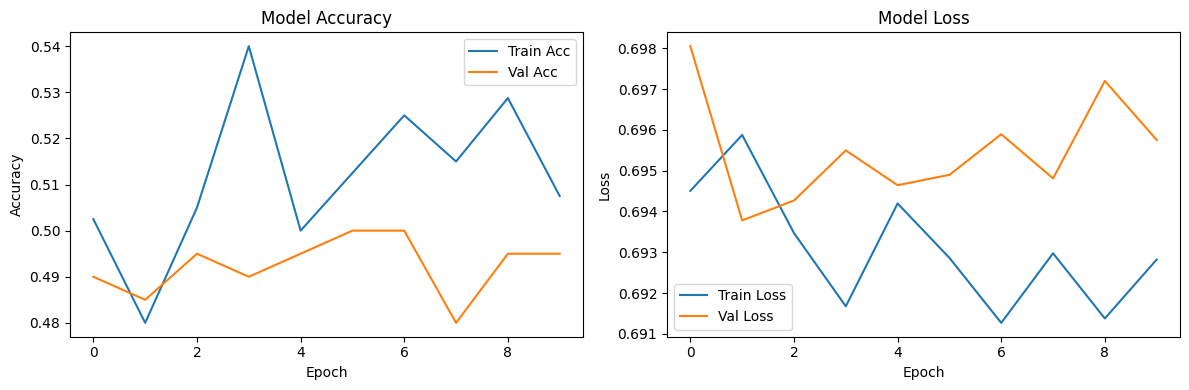

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


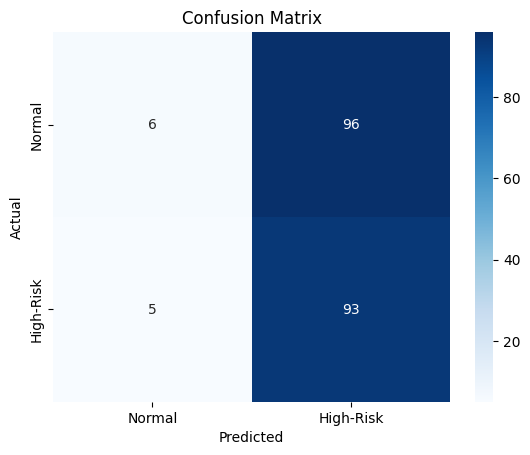


Classification Report:

              precision    recall  f1-score   support

      Normal       0.55      0.06      0.11       102
   High-Risk       0.49      0.95      0.65        98

    accuracy                           0.49       200
   macro avg       0.52      0.50      0.38       200
weighted avg       0.52      0.49      0.37       200



In [6]:
# maternal_risk_model_visual.py

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# -----------------------------
# 1. Generate Synthetic Dataset
# -----------------------------
np.random.seed(42)
tf.random.set_seed(42)

samples = 1000
time_steps = 10
features = 5

X = np.random.rand(samples, time_steps, features)
y = np.random.randint(0, 2, size=(samples, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# 2. Build the Model
# -----------------------------
model = Sequential([
    LSTM(64, input_shape=(time_steps, features)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# -----------------------------
# 3. Train the Model with History
# -----------------------------
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# -----------------------------
# 4. Evaluate & Visualize
# -----------------------------
# Accuracy & Loss Plot
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------
# 5. Confusion Matrix
# -----------------------------
y_pred = (model.predict(X_test) > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "High-Risk"], yticklabels=["Normal", "High-Risk"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------
# 6. Classification Report
# -----------------------------
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Normal", "High-Risk"]))
